# **IMAGE PROCESSING**
Image processing encompasses a wide range of algorithms and techniques aimed at manipulating, enhancing, analyzing, and understanding images. Here are some fundamental image processing algorithms and parameters

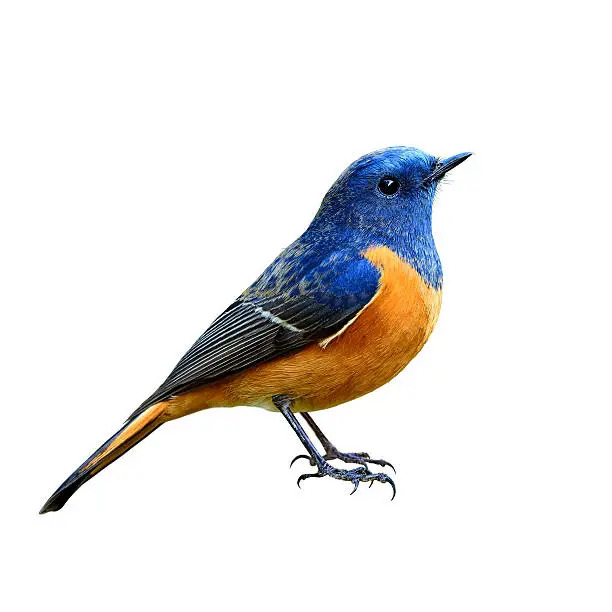

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Read an image from file
image = cv2.imread("/content/image1.jpg")

if image is not None:
    # Display the image
    cv2_imshow(image)
else:
    print("Error: Image not loaded.")



# **GRAYSCALE**
The taken example is converted to grayscale


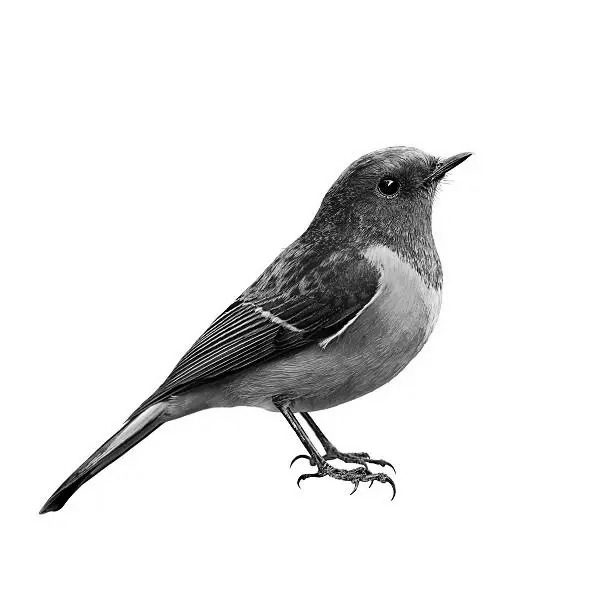

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Read an image from file
image = cv2.imread("/content/image1.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
cv2_imshow(gray_image)



# **RESIZE**
The image can be resized by commanding the combination of height and width

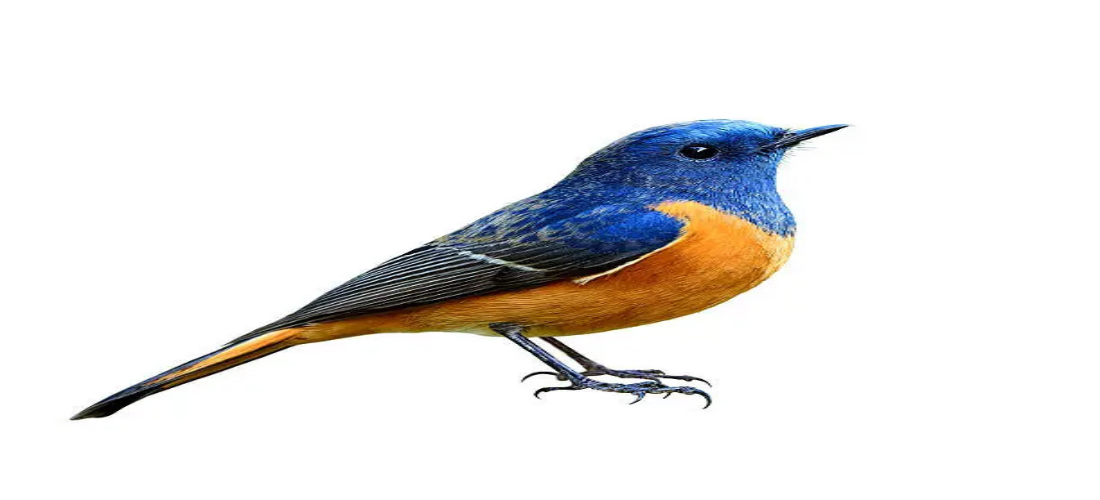

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Read an image from file
image = cv2.imread("/content/image1.jpg")

# Resize the image to a specific width and height
new_width = 300  # replace with your desired width
new_height = 200  # replace with your desired height
resized_image = cv2.resize(image, (1100, 500))

# Display the resized image
cv2_imshow(resized_image)



# **ROTATION**
The observed image is rotated 90 degree on it each given command.


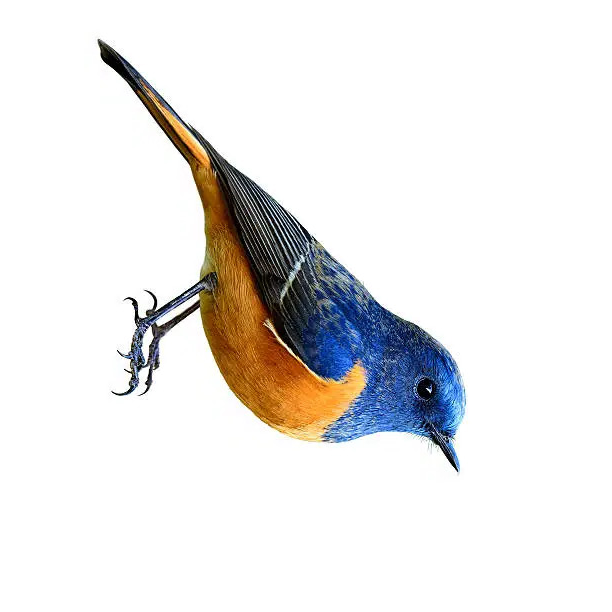

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Read an image from file
image = cv2.imread("/content/image1.jpg")

# Rotate the image by a specific angle (e.g., 90 degrees)
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Display the rotated image
cv2_imshow(rotated_image)



# **THRESHOLD**
Thresholding is a common technique in image processing used to separate objects or regions in an image based on pixel intensity

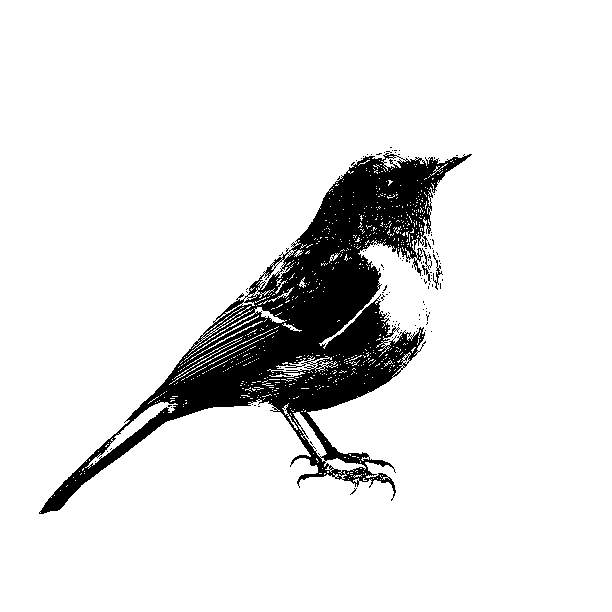

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Read an image from file
image = cv2.imread("/content/image1.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresholded_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Display the thresholded image
cv2_imshow(thresholded_image)



# **GAUSSIAN BLUR AND MEDIAN BLUR**
Gaussian blur and median blur are common image smoothing techniques used in image processing to reduce noise and detail through spatial filters.
* Gaussian blur is a technique that uses a weighted average of neighboring pixels to blur an image.
* Median blur is a technique that replaces each pixel's value with the median value of its neighboring pixels.


GAUSSIAN


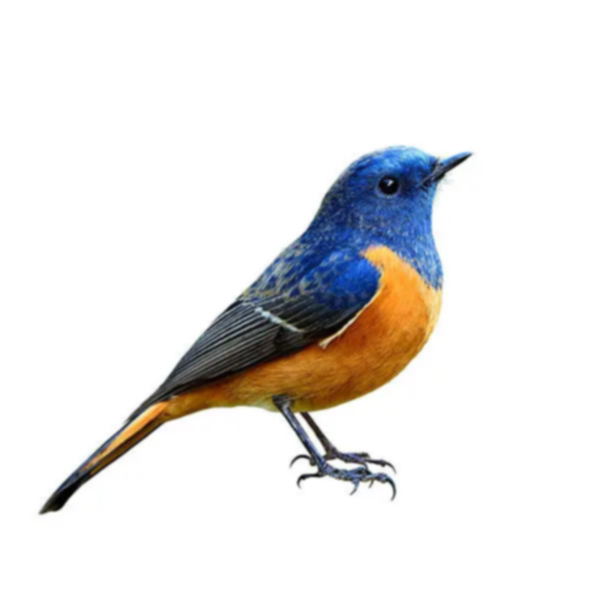

MEDIAN


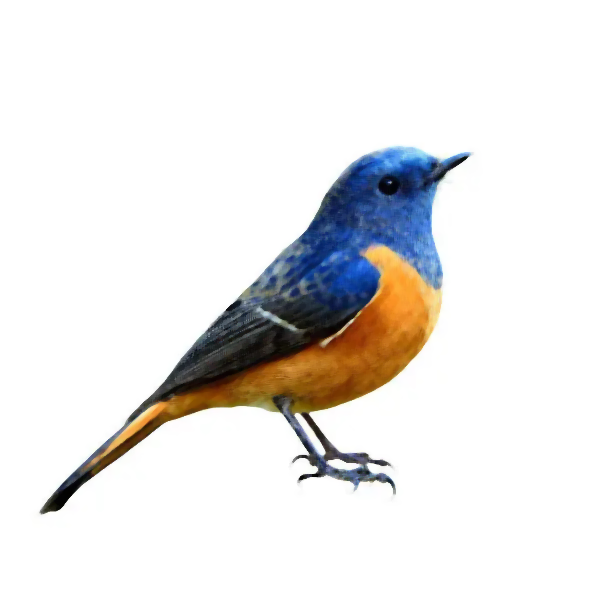

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Read an image from file
image = cv2.imread("/content/image1.jpg")

# Apply Gaussian blur with a specified kernel size
gaussian_blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Median filter with a specified kernel size
median_filtered_image = cv2.medianBlur(image, 5)

# Gaussian-blurred, and Median-filtered images
print("GAUSSIAN")
cv2_imshow(gaussian_blurred_image)
print("MEDIAN")
cv2_imshow(median_filtered_image)


# **COLOR SEPARARTION**#
The given sample image is analyzed by separating its ground colours and models such as RGB model.

original image


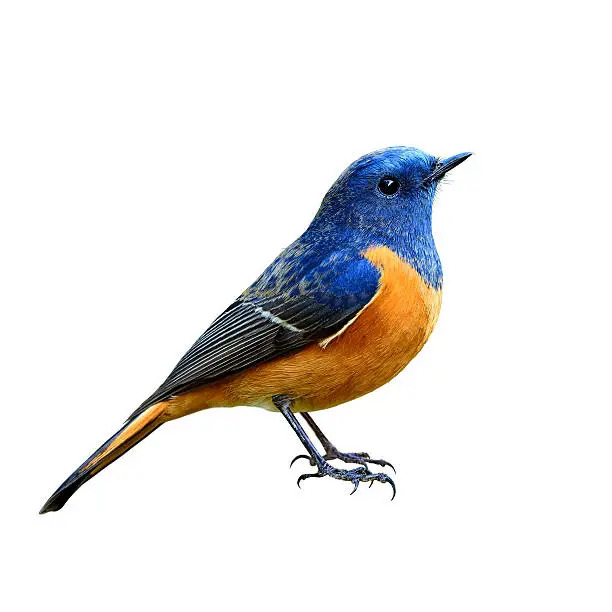

red result


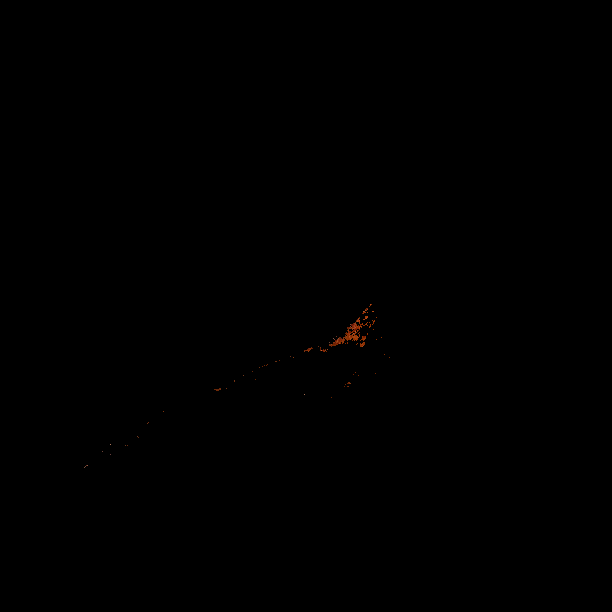

blue result


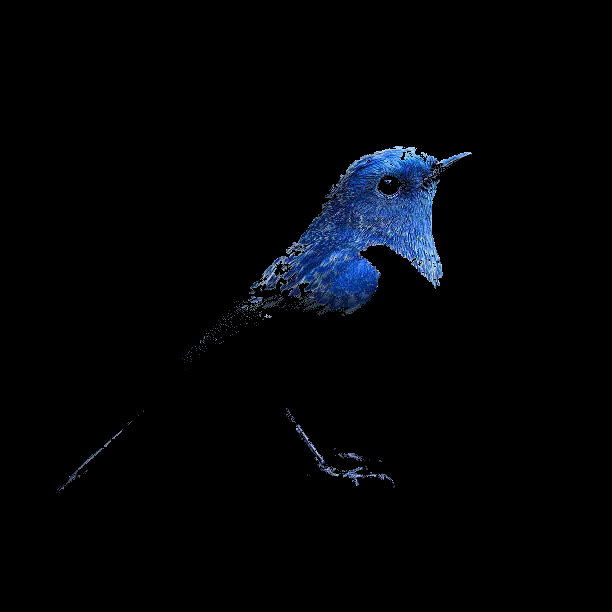

green result


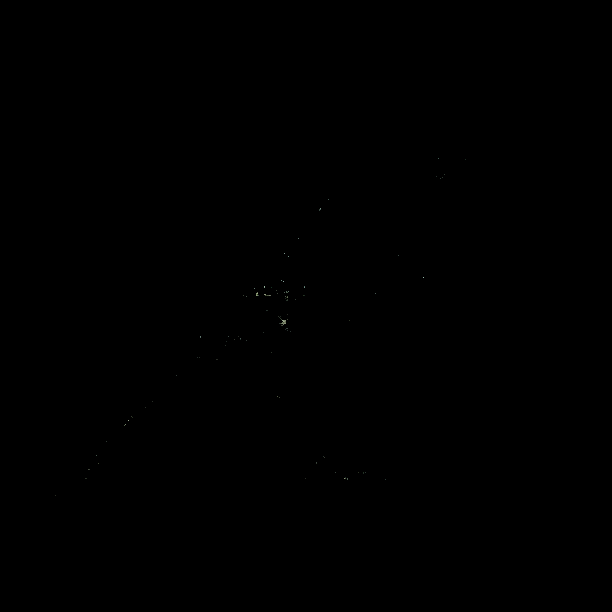

yellow result


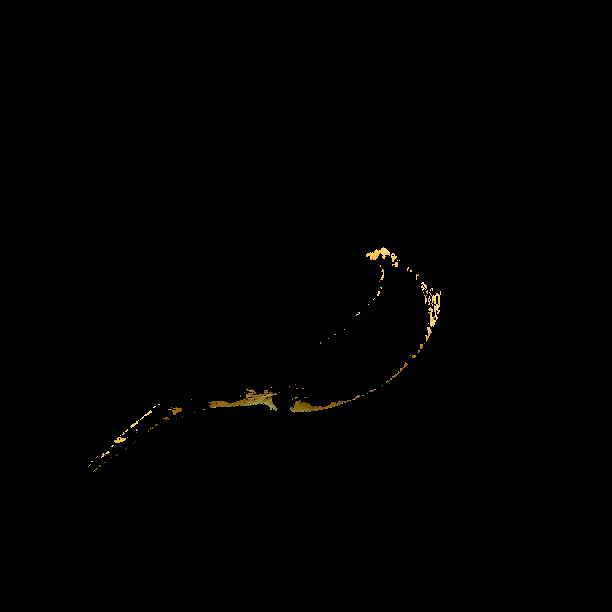

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Read an image from file
image = cv2.imread("/content/image1.jpg")

# Convert the image from BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the ranges for each color in HSV
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Create masks for each color
red_mask = cv2.inRange(hsv_image, lower_red, upper_red)
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Apply the individual masks to the original image
red_result = cv2.bitwise_and(image, image, mask=red_mask)
blue_result = cv2.bitwise_and(image, image, mask=blue_mask)
green_result = cv2.bitwise_and(image, image, mask=green_mask)
yellow_result = cv2.bitwise_and(image, image, mask=yellow_mask)

# Display the original and individual color-detected images
print("original image")
cv2_imshow(image)
print("red result")
cv2_imshow(red_result)
print("blue result")
cv2_imshow(blue_result)
print("green result")
cv2_imshow(green_result)
print("yellow result")
cv2_imshow(yellow_result)




# **HISTOGRAM EQUALIZATION**
Histogram equalization is a technique used in image processing to enhance the contrast of an image by redistributing pixel intensities.

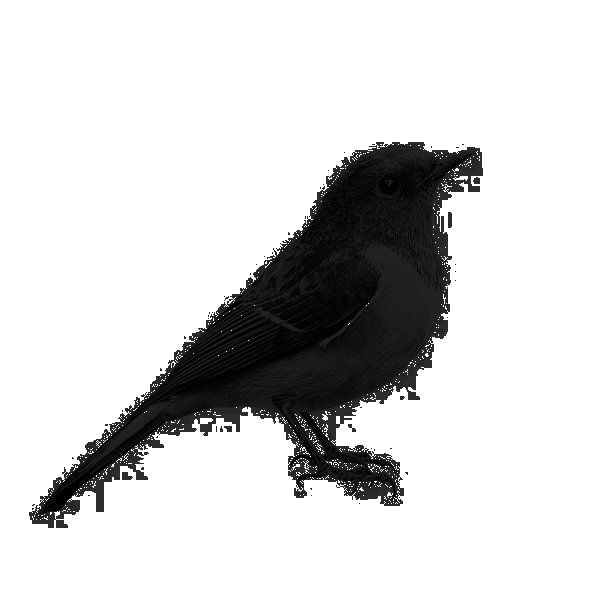

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Read an image from file
image = cv2.imread("/content/image1.jpg", cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
cv2_imshow(equalized_image)


# **WATERSHED ALGORITHM**

The Watershed Algorithm is a powerful image segmentation technique used in computer vision and image processing to separate objects in an image based on the topography or intensity gradient. It is particularly useful for segmenting images where the boundaries between objects are not well-defined.

watershed algorithm


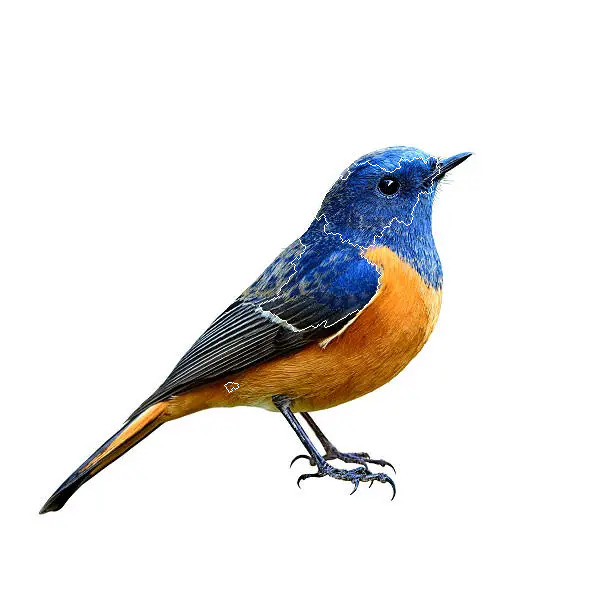

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Read an image from file
image = cv2.imread("/content/image1.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, thresholded = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Perform morphological operations to clean the binary image
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with 0
markers[unknown == 255] = 0

# Apply the watershed algorithm
cv2.watershed(image, markers)

# Color the segmented regions
image[markers == -1] = [255, 255, 255]  # Mark watershed boundaries in white

# Display the original and segmented images
print("watershed algorithm")
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# **EDGE DETECTION**
1.SOBEL OPERATOR

It calculates the gradient of the image intensity, highlighting areas of rapid intensity change, which often correspond to edges. The operator uses convolution with a small, separable kernel to approximate the derivative of the image.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read an image from file
image = cv2.imread("/content/image1.jpg", cv2.IMREAD_GRAYSCALE)

# Apply the Sobel operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Combine the horizontal and vertical gradients to obtain the magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the magnitude to the range [0, 255]
sobel_magnitude = np.uint8(255 * sobel_magnitude / np.max(sobel_magnitude))

# Display the original and Sobel-edged image
print("SOBEL OPERATOR(edge detection)")
cv2_imshow(sobel_magnitude)


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'Sobel'


# **EROSION AND DILATION**
Erosion and dilation are two fundamental morphological operations in image processing. These operations are often used for tasks like noise reduction, image smoothing, and object detection. They involve the use of a structuring element, which is a small matrix that defines the neighborhood for each pixel in the image.

EROSION-erodes

DILATION-expands

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read an image from file
image = cv2.imread("/content/image1.jpg", cv2.IMREAD_GRAYSCALE)

# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Erosion
erosion_result = cv2.erode(image, kernel, iterations=1)

# Dilation
dilation_result = cv2.dilate(image, kernel, iterations=1)

# Display the original, eroded, and dilated images
print("EROSION")
cv2_imshow(erosion_result)
print("DILATION")
cv2_imshow(dilation_result)


# **FEATURE EXTRACTION**
1.SCALE INVARIANT FEATURE TRANSFORM

SIFT (Scale-Invariant Feature Transform) is a widely used computer vision algorithm for detecting and describing local features in images. It is particularly powerful for tasks such as object recognition, image stitching, and 3D reconstruction.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read an image from file
image = cv2.imread("/content/image1.jpg", cv2.IMREAD_GRAYSCALE)

# Create a SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the original image and the image with keypoints
print("SCALE INVARIANT FEATURE TRANSFORM")
cv2_imshow(image_with_keypoints)


**THANK YOU!!!!**